# ChEMBL api tutorial

```dataset_download.ipynb```にて、データセット処理にあまりにも時間がかかるので、chemblのpython apiを用いたデータ取得にチャレンジ。

[```chembl_webresource_client```パッケージのチュートリアル](https://github.com/chembl/chembl_webresource_client/blob/master/demo_wrc.ipynb)を写経しながら和訳していく。

## Available data entities

以下のコードでapiによって取得できる属性を列挙できる。

In [1]:
from chembl_webresource_client.new_client import new_client

available_resources = [resource for resource in dir(new_client) if not resource.startswith('_')]
print(available_resources)

['activity', 'activity_supplementary_data_by_activity', 'assay', 'assay_class', 'atc_class', 'binding_site', 'biotherapeutic', 'cell_line', 'chembl_id_lookup', 'compound_record', 'compound_structural_alert', 'description', 'document', 'document_similarity', 'drug', 'drug_indication', 'drug_warning', 'go_slim', 'image', 'mechanism', 'metabolism', 'molecule', 'molecule_form', 'official', 'organism', 'protein_classification', 'similarity', 'source', 'substructure', 'target', 'target_component', 'target_relation', 'tissue', 'xref_source']


(Available filtersとOnly operatorは一旦略)

## Molecules

以下では、分子情報をどのように取得できるか例を挙げていく。

### 1. Find a molecule by pref_name

In [2]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
mols = molecule.filter(pref_name__iexact='aspirin')
mols,len(mols)

([{'atc_classifications': ['B01AC06', 'N02BA01', 'N02BA51', 'A01AD05', 'N02BA71'], 'availability_type': 2, 'biotherapeutic': None, 'black_box_warning': 0, 'chebi_par_id': 15365, 'chemical_probe': 0, 'chirality': 2, 'cross_references': [{'xref_id': 'aspirin', 'xref_name': 'aspirin', 'xref_src': 'DailyMed'}, {'xref_id': '144203627', 'xref_name': 'SID: 144203627', 'xref_src': 'PubChem'}, {'xref_id': '144209315', 'xref_name': 'SID: 144209315', 'xref_src': 'PubChem'}, {'xref_id': '144210466', 'xref_name': 'SID: 144210466', 'xref_src': 'PubChem'}, {'xref_id': '170465039', 'xref_name': 'SID: 170465039', 'xref_src': 'PubChem'}, {'xref_id': '17389202', 'xref_name': 'SID: 17389202', 'xref_src': 'PubChem'}, {'xref_id': '17390036', 'xref_name': 'SID: 17390036', 'xref_src': 'PubChem'}, {'xref_id': '174007205', 'xref_name': 'SID: 174007205', 'xref_src': 'PubChem'}, {'xref_id': '26747283', 'xref_name': 'SID: 26747283', 'xref_src': 'PubChem'}, {'xref_id': '26752858', 'xref_name': 'SID: 26752858', 'xre

In [3]:
mol = mols[0]
#for k,v in mol.items():
#    print(k,v)
mol['pref_name'] #pref_nameという属性がaspirinである分子の情報を取得した。

'ASPIRIN'

### 2. Find a molecule by its synonyms

- ```pref_name```が見つからない場合
- レスポンスに含めたいフィールドを指定できるメソッド```only```を使用する。

In [4]:
from chembl_webresource_client.new_client import new_client
molecule = new_client.molecule
mols = molecule.filter(molecule_synonyms__molecule_synonym__iexact='viagra').only('molecule_chembl_id')
mols

[{'molecule_chembl_id': 'CHEMBL192'}, {'molecule_chembl_id': 'CHEMBL1737'}]

### 3. Get a single molecule by ChEMBL id

ChEMBL上にすべての属性があるものにはChEMBL IDがついている。

In [5]:
from chembl_webresource_client.new_client import new_client
molecule = new_client.molecule
m1 = molecule.filter(chembl_id='CHEMBL192').only(['molecule_chembl_id','pref_name','molecule_structures'])
m1

[{'molecule_chembl_id': 'CHEMBL192', 'molecule_structures': {'canonical_smiles': 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12', 'molfile': '\n     RDKit          2D\n\n 33 36  0  0  0  0  0  0  0  0999 V2000\n    2.1000   -0.0042    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.1000    0.7000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.5375   -0.0042    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4917   -0.3667    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    0.8792   -0.0042    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.8042    0.9083    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4917    1.0625    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.8792    0.6833    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    3.2042    0.3458    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    2.8042   -0.2417    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2875   -0.3750    0.0000 C   0  0  0  0  0  0  0  0  0  

### 4. Get many molecules by id

複数のidを指定することで複数の分子を取得することができる。

In [6]:
from chembl_webresource_client.new_client import new_client
molecule = new_client.molecule
mols = molecule.filter(molecule_chembl_id__in=['CHEMBL25','CHEMBL192','CHEMBL27']).only(['molecule_chembl_id','pref_name'])
mols

[{'molecule_chembl_id': 'CHEMBL25', 'pref_name': 'ASPIRIN'}, {'molecule_chembl_id': 'CHEMBL27', 'pref_name': 'PROPRANOLOL'}, {'molecule_chembl_id': 'CHEMBL192', 'pref_name': 'SILDENAFIL'}]

### 5. Display a molecule image

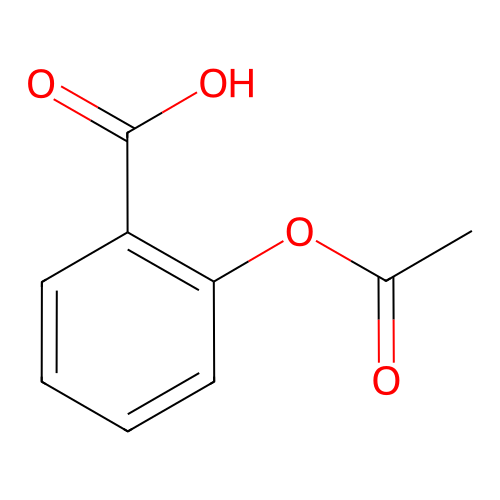

In [7]:
from chembl_webresource_client.new_client import new_client
from IPython.display import SVG

image = new_client.image
image.set_format('svg')
SVG(image.get('CHEMBL25'))

### 6. Get a single molecule by standard inchi key

In [8]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
mol = molecule.filter(molecule_structures__standard_inchi_key='BSYNRYMUTXBXSQ-UHFFFAOYSA-N').only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])
mol

[{'molecule_chembl_id': 'CHEMBL25', 'molecule_structures': {'canonical_smiles': 'CC(=O)Oc1ccccc1C(=O)O', 'molfile': '\n     RDKit          2D\n\n 13 13  0  0  0  0  0  0  0  0999 V2000\n   19.8052   -4.2758    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   19.8040   -5.0953    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   20.5121   -5.5043    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   21.2217   -5.0948    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   21.2189   -4.2722    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   20.5103   -3.8669    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   20.5078   -3.0497    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   21.2143   -2.6390    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   19.7989   -2.6432    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   21.9250   -3.8609    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   22.6343   -4.2668    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   23.3405   -3.8556    0.0000 C 

### 7. Find compounds similar to given SMILES query with similarity threshold of 70%

In [9]:
from chembl_webresource_client.new_client import new_client

similarity = new_client.similarity
res = similarity.filter(smiles="CO[C@@H](CCC#C\C=C/CCCC(C)CCCCC=C)C(=O)[O-]", similarity=70).only(['molecule_chembl_id', 'similarity','molecule_structures'])
for i in res:
    print(i)

{'molecule_chembl_id': 'CHEMBL478779', 'molecule_structures': {'canonical_smiles': 'C=CCCCCC(C)CCC/C=C/C#CCC[C@H](OC)C(=O)O', 'molfile': '\n     RDKit          2D\n\n 23 22  0  0  0  0  0  0  0  0999 V2000\n    7.8000   -6.7125    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    7.7958   -5.8875    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    8.5082   -5.4714    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    8.5165   -7.1214    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    7.0876   -7.1286    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    6.3711   -6.7197    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    7.0918   -7.9536    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    9.2289   -6.7053    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    9.9455   -7.1142    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   10.6542   -7.5250    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   11.3679   -7.9388    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   12.0831  

### 8. Find compounds similar to aspirin (CHEMBL25) with similarity threshold of 70%

In [10]:
from chembl_webresource_client.new_client import new_client

similarity = new_client.similarity
res = similarity.filter(chembl_id='CHEMBL25', similarity=70).only(['molecule_chembl_id', 'pref_name', 'similarity'])
res

[{'molecule_chembl_id': 'CHEMBL2296002', 'pref_name': None, 'similarity': '100'}, {'molecule_chembl_id': 'CHEMBL1697753', 'pref_name': 'ASPIRIN DL-LYSINE', 'similarity': '100'}, {'molecule_chembl_id': 'CHEMBL3833404', 'pref_name': 'CARBASPIRIN', 'similarity': '88.8888895511627197265625'}, {'molecule_chembl_id': 'CHEMBL3833325', 'pref_name': 'CARBASPIRIN CALCIUM', 'similarity': '88.8888895511627197265625'}, '...(remaining elements truncated)...']

### 9. Find compounds with the same connectivity

In [11]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
res = molecule.filter(molecule_structures__canonical_smiles__connectivity='CN(C)C(=N)N=C(N)N').only(['molecule_chembl_id', 'pref_name'])
for i in res:
    print(i)

{'molecule_chembl_id': 'CHEMBL1431', 'pref_name': 'METFORMIN'}
{'molecule_chembl_id': 'CHEMBL1703', 'pref_name': 'METFORMIN HYDROCHLORIDE'}
{'molecule_chembl_id': 'CHEMBL3094198', 'pref_name': None}


### 10. Get all apprved drugs

```order_by```メソッドを用いて分子量でソートする

In [12]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
approved_drugs = molecule.filter(max_phase=4).order_by('molecule_properties__mw_freebase')
approved_drugs

[{'atc_classifications': ['V03AN03'], 'availability_type': 1, 'biotherapeutic': None, 'black_box_warning': 0, 'chebi_par_id': 30217, 'chemical_probe': 0, 'chirality': 2, 'cross_references': [], 'dosed_ingredient': True, 'first_approval': 2015, 'first_in_class': 0, 'helm_notation': None, 'indication_class': 'Gases, Diluent for', 'inorganic_flag': 1, 'max_phase': '4.0', 'molecule_chembl_id': 'CHEMBL1796997', 'molecule_hierarchy': {'active_chembl_id': 'CHEMBL1796997', 'molecule_chembl_id': 'CHEMBL1796997', 'parent_chembl_id': 'CHEMBL1796997'}, 'molecule_properties': {'alogp': None, 'aromatic_rings': None, 'cx_logd': None, 'cx_logp': None, 'cx_most_apka': None, 'cx_most_bpka': None, 'full_molformula': 'He', 'full_mwt': '4.00', 'hba': None, 'hba_lipinski': None, 'hbd': None, 'hbd_lipinski': None, 'heavy_atoms': None, 'molecular_species': None, 'mw_freebase': '4.00', 'mw_monoisotopic': '4.0026', 'np_likeness_score': None, 'num_lipinski_ro5_violations': None, 'num_ro5_violations': None, 'psa'

### 11. Get approved drugs for lung cancer

In [13]:
from chembl_webresource_client.new_client import new_client

drug_indication = new_client.drug_indication
molecules = new_client.molecule

lung_cancer_ind = drug_indication.filter(efo_term__icontains="LUNG CARCINOMA")
lung_cancer_mols = molecules.filter(
    molecule_chembl_id__in=[x['molecule_chembl_id'] for x in lung_cancer_ind])

len(lung_cancer_mols)

716

### 12. Filter drugs by approval year and name

In [14]:
from chembl_webresource_client.new_client import new_client

drug = new_client.drug
res = drug.filter(first_approval__gte=1980).filter(usan_stem="-azosin")
res

[{'applicants': ['Abbott Laboratories Pharmaceutical Products Div', 'Heritage Pharma Labs Inc Dba Avet Pharmaceuticals Labs Inc', 'Ivax Pharmaceuticals Inc Sub Teva Pharmaceuticals Usa', 'Beximco Pharmaceuticals Usa Inc', 'Mylan Technologies Inc', 'Teva Pharmaceuticals Usa Inc', 'Jubilant Cadista Pharmaceuticals Inc', 'Apnar Pharma Lp', 'Ranbaxy Laboratories Ltd', 'Sandoz Inc'], 'atc_classification': [{'code': 'G04CA03', 'description': 'GENITO URINARY SYSTEM AND SEX HORMONES: UROLOGICALS: DRUGS USED IN BENIGN PROSTATIC HYPERTROPHY: Alpha-adrenoreceptor antagonists'}], 'availability_type': 1, 'biotherapeutic': None, 'black_box': 0, 'black_box_warning': '0', 'chirality': 0, 'development_phase': '4.0', 'drug_type': 1, 'first_approval': 1987, 'first_in_class': 0, 'helm_notation': None, 'indication_class': 'Antihypertensive', 'molecule_chembl_id': 'CHEMBL611', 'molecule_properties': {'alogp': '1.06', 'aromatic_rings': 2, 'cx_logd': '0.95', 'cx_logp': '1.18', 'cx_most_apka': None, 'cx_most_b

### 13. Get all biotherapeutic molecules

In [15]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
biotherapeutics = molecule.filter(biotherapeutic__isnull=False)
len(biotherapeutics)

23047

### 14. Get molecules with molecular weight <= 300

In [16]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
light_molecules = molecule.filter(molecule_properties__mw_freebase__lte=300)

len(light_molecules)

423016

### 15. Get molecules with molecular weight <= 300 AND pref_name ending with nib

In [17]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
light_nib_molecules = molecule.filter(molecule_properties__mw_freebase__lte=300, pref_name__iendswith="nib").only(['molecule_chembl_id', 'pref_name'])

light_nib_molecules

[{'molecule_chembl_id': 'CHEMBL276711', 'pref_name': 'SEMAXANIB'}, {'molecule_chembl_id': 'CHEMBL4594348', 'pref_name': 'ELSUBRUTINIB'}]

### 16. Get all molecules in ChEMBL with no Rule of Five violations

In [18]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
no_violations = molecule.filter(molecule_properties__num_ro5_violations=0)
len(no_violations)

1655867

## Activities

### 1. Get all IC50 activities related to the hERG target

In [19]:
from chembl_webresource_client.new_client import new_client

target = new_client.target
activity = new_client.activity
herg = target.filter(pref_name__iexact='hERG').only('target_chembl_id')[0]
herg_activities = activity.filter(target_chembl_id=herg['target_chembl_id']).filter(standard_type="IC50")

len(herg_activities)

15255

In [20]:
herg_activities[0]

{'action_type': None,
 'activity_comment': None,
 'activity_id': 305156,
 'activity_properties': [],
 'assay_chembl_id': 'CHEMBL841079',
 'assay_description': 'Inhibition of hERG currents Kv11.1',
 'assay_type': 'T',
 'assay_variant_accession': None,
 'assay_variant_mutation': None,
 'bao_endpoint': 'BAO_0000190',
 'bao_format': 'BAO_0000019',
 'bao_label': 'assay format',
 'canonical_smiles': 'O=C1NCCN1CCN1CCC(c2cn(-c3ccc(F)cc3)c3ccc(Cl)cc23)CC1',
 'data_validity_comment': None,
 'data_validity_description': None,
 'document_chembl_id': 'CHEMBL1134478',
 'document_journal': 'J Med Chem',
 'document_year': 2001,
 'ligand_efficiency': None,
 'molecule_chembl_id': 'CHEMBL12713',
 'molecule_pref_name': 'SERTINDOLE',
 'parent_molecule_chembl_id': 'CHEMBL12713',
 'pchembl_value': '7.85',
 'potential_duplicate': 1,
 'qudt_units': 'http://www.openphacts.org/units/Nanomolar',
 'record_id': 71623,
 'relation': '=',
 'src_id': 1,
 'standard_flag': 1,
 'standard_relation': '=',
 'standard_text_va

### 2. Get all activities with a pChEMBL value for a molecule

In [21]:
from chembl_webresource_client.new_client import new_client

activities = new_client.activity
res = activities.filter(molecule_chembl_id="CHEMBL25", pchembl_value__isnull=False)
len(res)

146

### 3. Search for ADMET-related inhibitor assays (type A)

In [22]:
from chembl_webresource_client.new_client import new_client
assay = new_client.assay
res = assay.filter(discription__icontains='inhibit', assay_type='A')
res

[{'aidx': 'CLD0', 'assay_category': None, 'assay_cell_type': None, 'assay_chembl_id': 'CHEMBL884521', 'assay_classifications': [], 'assay_organism': 'Rattus norvegicus', 'assay_parameters': [], 'assay_strain': None, 'assay_subcellular_fraction': None, 'assay_tax_id': 10116, 'assay_test_type': None, 'assay_tissue': None, 'assay_type': 'A', 'assay_type_description': 'ADME', 'bao_format': 'BAO_0000357', 'bao_label': 'single protein format', 'cell_chembl_id': None, 'confidence_description': 'Direct single protein target assigned', 'confidence_score': 9, 'description': 'Inhibition of cytochrome P450 progesterone 15-alpha hydroxylase', 'document_chembl_id': 'CHEMBL1125500', 'relationship_description': 'Direct protein target assigned', 'relationship_type': 'D', 'src_assay_id': None, 'src_id': 1, 'target_chembl_id': 'CHEMBL3705', 'tissue_chembl_id': None, 'variant_sequence': None}, {'aidx': 'CLD0', 'assay_category': None, 'assay_cell_type': None, 'assay_chembl_id': 'CHEMBL615148', 'assay_class

## Tissues

### 1. Get tissue by BTO ID

In [23]:
from chembl_webresource_client.new_client import new_client

tissue = new_client.tissue
res = tissue.filter(bto_id="BTO:0001073")
res

[{'bto_id': 'BTO:0001073', 'caloha_id': 'TS-0798', 'efo_id': 'EFO:0000857', 'pref_name': 'Pituitary gland', 'tissue_chembl_id': 'CHEMBL3638173', 'uberon_id': 'UBERON:0000007'}]

### 2. Get tissue by Caloha id

In [24]:
from chembl_webresource_client.new_client import new_client

tissue = new_client.tissue
res = tissue.filter(caloha_id="TS-0490")
res

[{'bto_id': 'BTO:0000648', 'caloha_id': 'TS-0490', 'efo_id': 'EFO:0000834', 'pref_name': 'Intestine', 'tissue_chembl_id': 'CHEMBL3638176', 'uberon_id': 'UBERON:0000160'}]

### 3. Get tissue by Uberon id

In [25]:
from chembl_webresource_client.new_client import new_client

tissue = new_client.tissue
res = tissue.filter(uberon_id="UBERON:0000173")
res

[{'bto_id': 'BTO:0000068', 'caloha_id': 'TS-0034', 'efo_id': None, 'pref_name': 'Amniotic fluid', 'tissue_chembl_id': 'CHEMBL3638177', 'uberon_id': 'UBERON:0000173'}]

### 4. Get tissue by name

In [26]:
from chembl_webresource_client.new_client import new_client

tissue = new_client.tissue
res = tissue.filter(pref_name__istartswith="blood")
res

[{'bto_id': None, 'caloha_id': None, 'efo_id': None, 'pref_name': 'Blood brain barrier', 'tissue_chembl_id': 'CHEMBL3987461', 'uberon_id': 'UBERON:0000120'}, {'bto_id': 'BTO:0000089', 'caloha_id': 'TS-0079', 'efo_id': 'EFO:0000296', 'pref_name': 'Blood', 'tissue_chembl_id': 'CHEMBL3638178', 'uberon_id': 'UBERON:0000178'}, {'bto_id': 'BTO:0001102', 'caloha_id': 'TS-0080', 'efo_id': 'EFO:0000817', 'pref_name': 'Blood vessel', 'tissue_chembl_id': 'CHEMBL3987656', 'uberon_id': 'UBERON:0001981'}, {'bto_id': 'BTO:0000102', 'caloha_id': None, 'efo_id': None, 'pref_name': 'Blood clot', 'tissue_chembl_id': 'CHEMBL3987655', 'uberon_id': 'UBERON:0010210'}, '...(remaining elements truncated)...']

## Cells

### Get cell line by cellosaurus id

In [27]:
from chembl_webresource_client.new_client import new_client
cell_line = new_client.cell_line
res = cell_line.filter(cellosaurus_id="CVCL_0417")
res

[{'cell_chembl_id': 'CHEMBL3307686', 'cell_description': 'MDA-MB-435 (Breast metastasis of melanoma cells', 'cell_id': 687, 'cell_name': 'MDA-MB-435', 'cell_source_organism': 'Homo sapiens', 'cell_source_tax_id': 9606, 'cell_source_tissue': 'Breast metastasis of melanoma cells', 'cellosaurus_id': 'CVCL_0417', 'cl_lincs_id': None, 'clo_id': None, 'efo_id': 'EFO_0001213'}]

## Targets

### Find a target by gene name

In [28]:
from chembl_webresource_client.new_client import new_client
target = new_client.target
gene_name = "BRD4"
res = target.filter(target_synonym__icontains=gene_name).only(['organism', 'pref_name', 'target_type'])
for i in res:
    print(i)

{'organism': 'Homo sapiens', 'pref_name': 'Bromodomain-containing protein 4', 'target_type': 'SINGLE PROTEIN'}
{'organism': 'Mus musculus', 'pref_name': 'Bromodomain-containing protein 4', 'target_type': 'SINGLE PROTEIN'}
{'organism': 'Homo sapiens', 'pref_name': 'BRD4/HDAC1', 'target_type': 'PROTEIN COMPLEX'}
{'organism': 'Homo sapiens', 'pref_name': 'Cereblon/Cullin-4A/Bromodomain-containing protein 4', 'target_type': 'PROTEIN-PROTEIN INTERACTION'}
{'organism': 'Homo sapiens', 'pref_name': 'Cereblon/Bromodomain-containing protein 4', 'target_type': 'PROTEIN-PROTEIN INTERACTION'}
{'organism': 'Homo sapiens', 'pref_name': 'von Hippel-Lindau disease tumor suppressor/Bromodomain-containing protein 4', 'target_type': 'PROTEIN-PROTEIN INTERACTION'}
{'organism': 'Homo sapiens', 'pref_name': 'Cereblon/DNA damage-binding protein 1/Bromodomain-containing protein 4', 'target_type': 'PROTEIN-PROTEIN INTERACTION'}
{'organism': 'Homo sapiens', 'pref_name': 'von Hippel-Lindau disease tumor suppress

## References

### 1. Find all PubMed IDs from a list that exist in the ChEMBL database.

In [29]:
from chembl_webresource_client.new_client import new_client
ids = (27502541, 27584694, 27977190, 81377812)
pubmed_IDs = new_client.document
pm = pubmed_IDs.filter(pubmed_id__in=ids).only('pubmed_id')
pm

[{'pubmed_id': 27502541}, {'pubmed_id': 27584694}, {'pubmed_id': 27977190}]

### 2. Find all Datasets that were produced after 2021

In [30]:
datasets = new_client.document
ds = datasets.filter(year__gte=2021, doc_type = 'DATASET')
ds

[{'abstract': '', 'authors': 'University of Dundee', 'chembl_release': {'chembl_release': 'CHEMBL_24', 'creation_date': '2018-04-23T00:00:00'}, 'doc_type': 'DATASET', 'document_chembl_id': 'CHEMBL3988442', 'doi': '10.6019/CHEMBL3988442', 'doi_chembl': None, 'first_page': None, 'issue': None, 'journal': None, 'journal_full_title': None, 'last_page': None, 'patent_id': None, 'pubmed_id': None, 'src_id': 33, 'title': 'University of Dundee, Small-Polar-MMV Screening Library', 'volume': None, 'year': 2021}, {'abstract': 'SGC Frankfurt donated chemical probe project: A-079 was donated by Abbvie. Website: https://www.sgc-ffm.uni-frankfurt.de/#!specificprobeoverview/A-079. Control: A-226. References: 1. Bianchi, Bruce R, Xu-Feng Zhang, Regina M Reilly, Philip R Kym, Betty B Yao, and Jun Chen. 2012. ‘Species Comparison and Pharmacological Characterization of Human, Monkey, Rat, and Mouse TRPA1 Channels’. The Journal of Pharmacology and Experimental Therapeutics 341(2):360–68. PMID: 22319196. 2.

## Sources

### Get the table of ChEMBL sources

In [31]:
sources = new_client.source
sources

[{'src_description': 'Undefined', 'src_id': 0, 'src_short_name': 'UNDEFINED'}, {'src_description': 'Scientific Literature', 'src_id': 1, 'src_short_name': 'LITERATURE'}, {'src_description': 'GSK Malaria Screening', 'src_id': 2, 'src_short_name': 'GSK_TCMDC'}, {'src_description': 'Novartis Malaria Screening', 'src_id': 3, 'src_short_name': 'NOVARTIS'}, '...(remaining elements truncated)...']

## Utils

### 1. Convert SMILES to CTAB

In [32]:
from chembl_webresource_client.utils import utils
aspirin = utils.smiles2ctab('O=C(Oc1ccccc1C(=O)O)C')
print(aspirin)


     RDKit          2D

 13 13  0  0  0  0  0  0  0  0999 V2000
   -1.8012   -1.1888    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7990   -0.1888    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9320    0.3096    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0672   -0.1922    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0690   -1.1922    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7960   -1.6940    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6630   -1.1956    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6650   -0.1956    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8000    0.3062    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8020    1.3060    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0630    1.8078    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.6690    1.8042    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6640    0.3130    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0

### 2. Compute Maximal Common Substructure

In [33]:
from chembl_webresource_client.utils import utils

smiles = ["O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C",
          "CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC", "c1(C=O)cc(OC)c(O)cc1"]
mols = [utils.smiles2ctab(smile) for smile in smiles]
sdf = ''.join(mols)
result = utils.mcs(sdf)
result

'[#6]1(-[#6]):[#6]:[#6](-[#8]-[#6]):[#6](:[#6]:[#6]:1)-[#8]'

### 3. Compute various molecular descriptors

In [34]:
from chembl_webresource_client.utils import utils
import json

aspirin = utils.smiles2ctab('O=C(Oc1ccccc1C(=O)O)C')
descs = json.loads(utils.chemblDescriptors(aspirin))[0]
descs

{'qed': 0.5501217966938848,
 'MolWt': 180.15899999999996,
 'TPSA': 63.60000000000001,
 'HeavyAtomCount': 13,
 'NumAromaticRings': 1,
 'NumHAcceptors': 3,
 'NumHDonors': 1,
 'NumRotatableBonds': 2,
 'MolLogP': 1.3100999999999998,
 'MolecularFormula': 'C9H8O4',
 'Ro3Pass': 0,
 'NumRo5': 0,
 'MonoisotopicMolWt': 180.042258736}

### 4. Compute atructural alerts

In [35]:
from chembl_webresource_client.utils import utils

mol = utils.smiles2ctab("O=C(Oc1ccccc1C(=O)O)C")
alerts = json.loads(utils.structuralAlerts(mol))
for a in alerts[0]:
    print(a)

{'alert_id': 1030, 'alert_name': 'Ester', 'set_name': 'MLSMR', 'smarts': '[#6]-C(=O)O-[#6]'}
{'alert_id': 1069, 'alert_name': 'vinyl michael acceptor1', 'set_name': 'MLSMR', 'smarts': '[#6]-[CH1]=C-C(=O)[#6,#7,#8]'}


### 5. Standardize a molecule

In [36]:
from chembl_webresource_client.utils import utils
mol = utils.smiles2ctab("[Na]OC(=O)Cc1ccc(C[NH3+])cc1.c1nnn[n-]1.O")
st = json.loads(utils.standardize(mol))
st

[{'standard_molblock': '\n     RDKit          2D\n\n 19 17  0  0  0  0  0  0  0  0999 V2000\n   -1.4275   -2.9831    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -4.9566   -0.4188    0.0000 Na  0  0  0  0  0 15  0  0  0  0  0  0\n   -4.0888   -0.9158    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -3.2246   -0.4126    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -3.2282    0.5874    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.3568   -0.9096    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.4926   -0.4064    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.6248   -0.9034    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2394   -0.4002    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2360    0.5998    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.1000    1.1028    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.9680    0.6060    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.6320    1.0968    0.0000 C   0  0  0  0  0  0  0 

### 6. Calculate the parent molecule

In [37]:
from chembl_webresource_client.utils import utils

mol = utils.smiles2ctab("[Na]OC(=O)Cc1ccc(C[NH3+])cc1.c1nnn[n-]1.[Na]")
par = json.loads(utils.getParent(mol))
par

[{'parent_molblock': '\n     RDKit          2D\n\n 18 18  0  0  0  0  0  0  0  0999 V2000\n   -4.9566   -0.4188    0.0000 Na  0  0  0  0  0  1  0  0  0  0  0  0\n   -4.0888   -0.9158    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -3.2246   -0.4126    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -3.2282    0.5874    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.3568   -0.9096    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.4926   -0.4064    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.6248   -0.9034    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2394   -0.4002    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2360    0.5998    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.1000    1.1028    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.9680    0.6060    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.6320    1.0968    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.4960    0.5936    0.0000 C   0  0  0  0  0  0  0  0